# Employee Sentiment Analysis - All Tasks in One Notebook

This notebook covers:
1. Sentiment Labeling
2. Exploratory Data Analysis (EDA)
3. Employee Score Calculation
4. Employee Ranking
5. Flight Risk Identification
6. Predictive Modeling

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os

nltk.download('vader_lexicon')

# Ensure outputs directory exists
os.makedirs('outputs', exist_ok=True)

In [ ]:
df = pd.read_csv('data\employee.csv')
df.head()

In [ ]:
def vader_sentiment_label(text):
    sid = SentimentIntensityAnalyzer()
    score = sid.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# If your message column is named differently, adjust below
df['sentiment'] = df['body'].apply(vader_sentiment_label)
df.to_csv('employee_with_sentiment.csv', index=False)
df[['body', 'sentiment']].head()

<>:13: SyntaxWarning: invalid escape sequence '\E'
<>:13: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ashra\AppData\Local\Temp\ipykernel_20120\2873156323.py:13: SyntaxWarning: invalid escape sequence '\E'
  df.to_csv('D:\Employee Sentiment Analysis\outputs\employee_with_sentiment.csv', index=False)


,body,sentiment
0,EnronOptions Announcement\n\n\nWe have updated...,Positive
1,"Marc,\n\nUnfortunately, today is not going to ...",Positive
2,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",Neutral
3,we were thinking papasitos (we can meet somewh...,Neutral
4,Since you never gave me the $20 for the last t...,Positive


### Exploratory Data Analysis (EDA)

In [8]:
# --- Task 2 - Exploratory Data Analysis (EDA) ---

print("Data Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Data:\n", df.head())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB
None

Missing Values:
 Subject      0
body         0
date         0
from         0
sentiment    0
dtype: int64

Sample Data:
                                         Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body        date  \
0  EnronOptions Announcement\n\n\nWe have updated...  2010-05-10   


<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ashra\AppData\Local\Temp\ipykernel_20120\1636399430.py:5: SyntaxWarning: invalid escape sequence '\E'
  plt.savefig('D:\Employee Sentiment Analysis\outputs\sentiment_distribution.png')


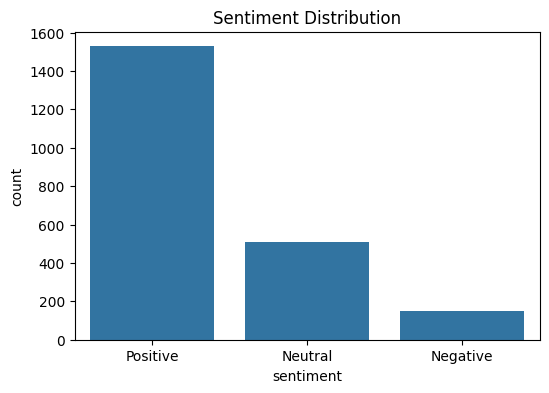

In [ ]:
# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.savefig('outputs\sentiment_distribution.png')
plt.show()

In [10]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')


<>:6: SyntaxWarning: invalid escape sequence '\E'
<>:6: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ashra\AppData\Local\Temp\ipykernel_20120\2085825591.py:6: SyntaxWarning: invalid escape sequence '\E'
  plt.savefig('D:\Employee Sentiment Analysis\outputs\monthly_sentiment_trends.png')


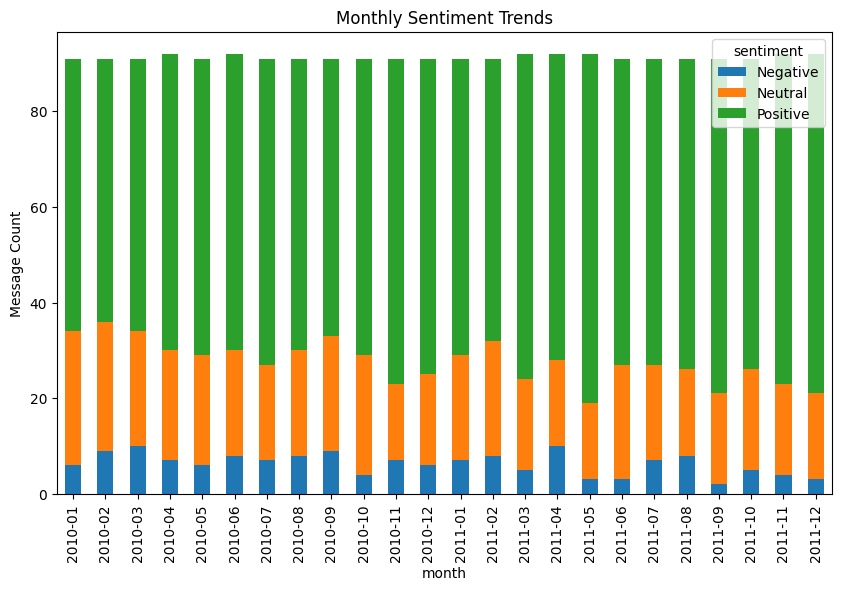

In [ ]:
# Sentiment over time (monthly)
monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Monthly Sentiment Trends')
plt.ylabel('Message Count')
plt.savefig('outputs\monthly_sentiment_trends.png')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\E'
<>:8: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ashra\AppData\Local\Temp\ipykernel_20120\1018529586.py:8: SyntaxWarning: invalid escape sequence '\E'
  plt.savefig('D:\Employee Sentiment Analysis\outputs\messages_per_employee.png')


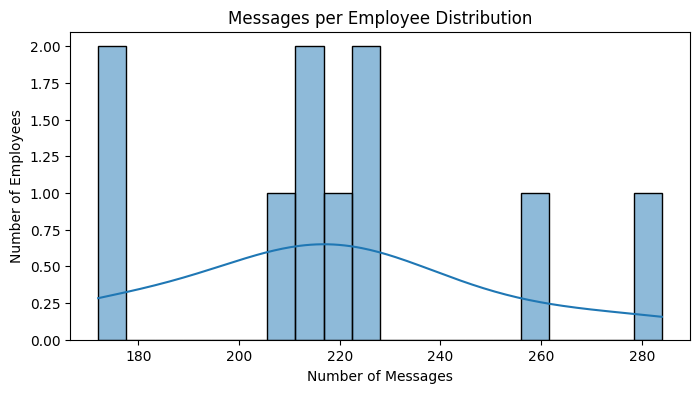

In [ ]:
# Messages per employee
employee_msg_count = df['from'].value_counts()
plt.figure(figsize=(8,4))
sns.histplot(employee_msg_count, bins=20, kde=True)
plt.title('Messages per Employee Distribution')
plt.xlabel('Number of Messages')
plt.ylabel('Number of Employees')
plt.savefig('outputs\messages_per_employee.png')
plt.show()

In [ ]:
# Average message length by sentiment
df['msg_length'] = df['body'].astype(str).apply(len)
avg_length = df.groupby('sentiment')['msg_length'].mean()
avg_length.to_csv('outputs\\avg_msg_length_by_sentiment.csv')
avg_length

sentiment
Negative    254.671053
Neutral     119.771037
Positive    308.099476
Name: msg_length, dtype: float64

### Employee Score Calculation

In [ ]:
# --- Task 3 - Employee Score Calculation ---

score_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['sentiment_score'] = df['sentiment'].map(score_map)
monthly_scores = df.groupby(['from', 'month'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'from': 'employee', 'sentiment_score': 'monthly_score'}, inplace=True)
monthly_scores.to_csv('outputs\employee_monthly_scores.csv', index=False)
monthly_scores.head()

<>:7: SyntaxWarning: invalid escape sequence '\E'
<>:7: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ashra\AppData\Local\Temp\ipykernel_20120\301373438.py:7: SyntaxWarning: invalid escape sequence '\E'
  monthly_scores.to_csv('D:\Employee Sentiment Analysis\outputs\employee_monthly_scores.csv', index=False)


,employee,month,monthly_score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,6
3,bobette.riner@ipgdirect.com,2010-04,3
4,bobette.riner@ipgdirect.com,2010-05,2


### Employee Ranking

In [ ]:
# --- Task 4 - Employee Ranking ---

rankings = []
for month in monthly_scores['month'].unique():
    month_scores = monthly_scores[monthly_scores['month'] == month]
    # Top 3 positive
    top_pos = month_scores.sort_values(['monthly_score', 'employee'], ascending=[False, True]).head(3)
    top_pos['rank_type'] = 'Top Positive'
    # Top 3 negative
    top_neg = month_scores.sort_values(['monthly_score', 'employee'], ascending=[True, True]).head(3)
    top_neg['rank_type'] = 'Top Negative'
    rankings.append(pd.concat([top_pos, top_neg]))

rankings_df = pd.concat(rankings)
rankings_df.to_csv('outputs\employee_monthly_rankings.csv', index=False)
rankings_df

<>:15: SyntaxWarning: invalid escape sequence '\E'
<>:15: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ashra\AppData\Local\Temp\ipykernel_20120\249909601.py:15: SyntaxWarning: invalid escape sequence '\E'
  rankings_df.to_csv('D:\Employee Sentiment Analysis\outputs\employee_monthly_rankings.csv', index=False)


,employee,month,monthly_score,rank_type
120,kayne.coulter@enron.com,2010-01,13,Top Positive
48,eric.bass@enron.com,2010-01,9,Top Positive
144,lydia.delgado@enron.com,2010-01,9,Top Positive
0,bobette.riner@ipgdirect.com,2010-01,1,Top Negative
96,johnny.palmer@enron.com,2010-01,1,Top Negative
...,...,...,...,...
191,patti.thompson@enron.com,2011-12,12,Top Positive
167,lydia.delgado@enron.com,2011-12,10,Top Positive
119,johnny.palmer@enron.com,2011-12,2,Top Negative
23,bobette.riner@ipgdirect.com,2011-12,3,Top Negative


### Flight Risk Identification

In [ ]:
# --- Task 5 - Flight Risk Identification ---

flight_risk_employees = set()
for emp_id, group in df[df['sentiment'] == 'Negative'].groupby('from'):
    group = group.sort_values('date')
    times = group['date'].tolist()
    for i in range(len(times)):
        window_start = times[i]
        window_end = window_start + pd.Timedelta(days=30)
        count = sum((t >= window_start) and (t < window_end) for t in times)
        if count >= 4:
            flight_risk_employees.add(emp_id)
            break

flight_risk_list = pd.DataFrame({'employee': list(flight_risk_employees)})
flight_risk_list.to_csv('outputs\\flight_risk_employees.csv', index=False)
flight_risk_list

,employee
0,johnny.palmer@enron.com
1,bobette.riner@ipgdirect.com
2,sally.beck@enron.com
3,don.baughman@enron.com


### Predictive Modeling

In [21]:
# --- Task 6 - Predictive Modeling ---

df['word_count'] = df['body'].astype(str).apply(lambda x: len(x.split()))
features = df.groupby(['from', 'month']).agg(
    msg_count=('body', 'count'),
    avg_msg_length=('msg_length', 'mean'),
    total_word_count=('word_count', 'sum')
).reset_index()



In [23]:
# Map sentiment to score first
df['sentiment_score'] = df['sentiment'].map({'Positive':1, 'Negative':-1, 'Neutral':0})

# Then group and sum
monthly_scores = df.groupby(['from', 'month'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'from': 'employee', 'sentiment_score': 'monthly_score'}, inplace=True)

In [24]:
data = pd.merge(features, monthly_scores, left_on=['from', 'month'], right_on=['employee', 'month'])

In [25]:
X = data[['msg_count', 'avg_msg_length', 'total_word_count']]
y = data['monthly_score']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Linear Regression Model Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")
print("Coefficients:", dict(zip(X.columns, model.coef_)))
print("Intercept:", model.intercept_)


Linear Regression Model Results:
RMSE: 3.40
R^2: 0.71
Coefficients: {'msg_count': np.float64(0.5626185401570353), 'avg_msg_length': np.float64(0.0011424755747707434), 'total_word_count': np.float64(0.0015352494633185066)}
Intercept: -0.22709071041349205


In [ ]:
# Save the model summary to a text file
with open('linear_regression_summary.txt', 'w') as f:
    f.write(f"RMSE: {rmse:.2f}\n")
    f.write(f"R^2: {r2:.2f}\n")
    f.write(f"Coefficients: {dict(zip(X.columns, model.coef_))}\n")
    f.write(f"Intercept: {model.intercept_}\n")

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ashra\AppData\Local\Temp\ipykernel_20120\1481833838.py:2: SyntaxWarning: invalid escape sequence '\E'
  with open('D:\Employee Sentiment Analysis\outputs\linear_regression_summary.txt', 'w') as f:
